# DMML-04

Ensemble modellek; modellek kiértékelése; metrikák.

Apagyi Dávid  
2025-10-02

**Honlap:** <a href="https://apagyidavid.web.elte.hu/2025-2026-1/dmml"
target="_blank">apagyidavid.web.elte.hu/2025-2026-1/dmml</a>

<a target="_blank" href="https://colab.research.google.com/github/dapagyi/dmml-web/blob/notebooks/dmml-04.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble (hibrid) modellek, módszerek; döntési fa alapú hibrid modellek

Előzmény: döntési fák, mint egyszerű modellek.

Előadáson remélhetőleg szerepelt:

-   Bagging (<strong>B</strong>ootstrap <strong>A</strong>ggregating)
-   Boosting

Sok példa (nem kifejezetten a fenti kettőre):

-   <a
    href="https://scikit-learn.org/stable/auto_examples/ensemble/index.html"
    target="_blank">Examples (<code>scikit-learn</code>): Ensemble
    methods</a>

## Bagging (Bootstrap Aggregating)

Visszatetéses mintavételezéssel több tanítókészletet hozunk létre, és
mindegyiken külön modellt tanítunk. A végső predikció ezeknek a
modelleknek a predikcióiból aggregálással (pl. átlagolás, többségi
szavazás) jön létre.

### Közvetlen alkalmazás: Bagged Tree

-   <a href="https://en.wikipedia.org/wiki/Bootstrap_aggregating"
    target="_blank">Wikipedia: Bootstrap aggregating</a>

### Továbbfejlesztés: Random Forest (véletlen erdő)

Továbbfejlesztjük az előbbi ötletet azzal, hogy a döntési fák építése
során minden vágásnál csak egy véletlenszerűen kiválasztott részhalmazát
veszünk figyelembe a változóknak; $f$ feature esetén tipikusan csak
$\sqrt{f}$ vagy $f/3$ változót.

Az előbbi Wikipedia szócikk elég jó leírást ad a Random Forest
működéséről is, illetve általában a baggingről, mint ensemble
módszerről.

## Boosting

*Erős modellt* építünk *gyenge tanulók* (modellek) szekvenciális
hozzáadásával, amelyek az előzőek hibáit próbálják javítani.

A végső modellt $F= \sum_{i=1}^{m} \gamma_i h_i$ alakban keressük, ahol

-   $h_i$ az $i$-edik gyenge modell (általában egy döntési fa),
-   $\gamma_i$ pedig ezen gyenge modell súlya a végső predikcióban. A
    súly meghatározása algoritmusonként változó, de jellemzően szigorúan
    monoton csökken, így a későbbi tanulók súlya csökken.

A cél az, hogy a végső $F$ minimalizálja az $L$ veszteségfüggvényünket.

A gyenge modellek $\mathcal{F}$ osztálya általában döntési fák egy
részcsaládja, pl. adott mélységű döntési fák.

$F$-et additívan, mohó módon bővítjük a gyenge tanulókkal (modellekkel),
mégpedig úgy, hogy a következő modell az előzőleg felépített modell
*hibáit javítsa*.

Ha az $i$-edik iterációig felépített erős tanulót $F_i$-vel jelöljük,
akkor a következő gyenge tanuló $h_i$ úgy kerül kiválasztásra, hogy
minimalizálja a veszteségfüggvényt az aktuális modell hibáin:
$$ F_i = F_{i-1} + \underset{h_i \in \mathcal{F}}{\operatorname{arg min}}\; L\big((F_{i-1} + h_i)(x), y\big) $$

### Közvetlen alkalmazás: Boosted Tree

-   <a href="https://xgboost.readthedocs.io/en/stable/tutorials/model.html"
    target="_blank">XGBoost dokumentációból szemléletes magyarázat,
    példa</a>

### Továbbfejlesztés: Gradient Boosted Tree

A fenti formulát “gradiensmódszerrel” közelítjük. (Hogy ez pontosan mit
jelent ebben a kontextusban, most ennél jobban nem részletezzük.
Röviden: az új fát, amit hozzá szeretnénk adni a modellhez, úgy
keressük, hogy a “pszeudo-reziduálisokra” illesztünk egy modellt.)
Ezenkívül még sokféle további trükköt alkalmaznak az egyes
implementációk.

-   <a
    href="https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosted-trees"
    target="_blank">User Guide (<code>scikit-learn</code>): Gradient-boosted
    trees</a>
-   <a href="https://xgboost.readthedocs.io/en/stable/"
    target="_blank">XGBoost</a>
-   <a href="https://lightgbm.readthedocs.io/en/latest/"
    target="_blank">LightGBM</a>
-   <a href="https://catboost.ai/docs/" target="_blank">CatBoost</a>
-   <a
    href="https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html"
    target="_blank">H2OGradientBoostingEstimator</a>

# Modellek kiértékelése, metrikák

## Regressziós metrikák

Eddig még csak a házi feladatban került elő, abban példaként az $R^2$
metrika szerepelt. Ez az egyik leggyakrabban használt regressziós
metrika, ezenkívül még a Mean Squared Error (MSE) és a Mean Absolute
Error (MAE) talán a leggyakoribb. A többit is érdemes egyszer
végigpörgetni:

-   <a
    href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics"
    target="_blank">User Guide (<code>scikit-learn</code>): Regression
    metrics</a>

## Klasszifikációs metrikák

A legtöbb a korábban már látott confusion matrixból közvetlenül
származtatható, a leggyakoribbak:

-   Accuracy:
    $\frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$.
-   Precision: $\frac{\text{TP}}{\text{TP} + \text{FP}}$.
-   Recall: $\frac{\text{TP}}{\text{TP} + \text{FN}}$.
-   F1-score:
    $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$,
    a precision és a recall harmonikus közepe.

Egy más típusú, de nagyon fontos klasszifikációs metrika a ROC AUC, ami
a ROC görbe alatti területet jelenti.

Számos másfajta metrika van még, érdemes egyszer ránézni, de
tapasztalatom szerint senki sem tudja fejből, hogy melyik melyik:

-   <a
    href="https://en.wikipedia.org/wiki/Confusion_matrix#:~:text=.-,Table%20of%20confusion,-%5Bedit%5D"
    target="_blank">Wikipedia: Confusion Matrix, Table of Confusion</a>
-   <a
    href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics"
    target="_blank">User Guide (<code>scikit-learn</code>): Classification
    metrics</a>

## Milyen metrikákat használjunk?

-   <a
    href="https://scikit-learn.org/stable/modules/model_evaluation.html#which-scoring-function-should-i-use"
    target="_blank">User Guide (<code>scikit-learn</code>): Which scoring
    function should I use?</a>

Remek leírás a fenti, rövid – nem teljesértékű – kiemelés:

-   Ha adott, hogy milyen metrikát kell használni (pl. valamilyen
    business kontextusban vagy egy versenyen), akkor nincs kérdés, azt
    használjuk.
-   Ha nincs megkötés, akkor érdemes átgondolni a célunkat, hogy inkább
    valószínűségre van szükségünk, vagy inkább döntésre.
-   Mi eddig korábban a `.predict` metódust használtuk, ami döntést
    adott vissza. Pontosabb képet kaphatunk a modellünk képességeiről,
    ha a `.predict_proba` metódust használjuk, ami valószínűséget ad
    vissza.
    -   Ilyenkor a küszöböt (threshold) is meg kell adnunk, ami alapján
        döntést hozunk. Ezt a küszöböt érdemes lehet úgy megválasztani,
        hogy a nekünk fontos metrikát maximalizáljuk, de külső szempont
        is közrejátszhat.
    -   Az, hogy a modellen hogyan módosítsunk (kalibráljuk), hogy a
        predikciói a valószínűségeket jobban tükrözzék, egy külön téma,
        amivel mi nem fogunk most foglalkozni. Bővebben lásd a következő
        linkeket:
        -   <a href="https://scikit-learn.org/stable/modules/calibration.html"
            target="_blank">User Guide (<code>scikit-learn</code>): Probability
            calibration</a>
        -   <a
            href="https://scikit-learn.org/stable/modules/classification_threshold.html"
            target="_blank">User Guide (<code>scikit-learn</code>): Tuning the
            decision threshold for class prediction</a>
    -   Ha valószínűségeket prediktálunk, akkor a thresholdtól független
        metrikaként a ROC AUC hasznos lehet.

> **Megjegyzés**
>
> Ez a kérdéskör sokak számára képezi vita tárgyát. Néhány példa:
>
> -   <a
>     href="https://stats.stackexchange.com/questions/312780/why-is-accuracy-not-the-best-measure-for-assessing-classification-models/312787#312787"
>     target="_blank">Why is accuracy not the best measure for assessing
>     classification models?</a>
> -   <a
>     href="https://stats.stackexchange.com/questions/359909/is-accuracy-an-improper-scoring-rule-in-a-binary-classification-setting"
>     target="_blank">Is accuracy an improper scoring rule in a binary
>     classification setting?</a>
> -   <a
>     href="https://stats.stackexchange.com/questions/603663/academic-reference-on-the-drawbacks-of-accuracy-f1-score-sensitivity-and-or-sp"
>     target="_blank">Academic reference on the drawbacks of accuracy, F1
>     score, sensitivity and/or specificity</a>
> -   <a href="https://hbiostat.org/blog/post/class-damage/index.html"
>     target="_blank">Damage Caused by Classification Accuracy and Other
>     Discontinuous Improper Accuracy Scoring Rules</a>

A megfelelő metrika választásáról (igaz, kiegyensúlyozatlan adatokra
kihegyezve) egy *véleményes* cikk:

-   [Tour of Evaluation Metrics for Imbalanced
    Classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

Részlet a cikkből:

<figure>
<img
src="https://machinelearningmastery.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png"
alt="How to Choose a Metric for Imbalanced Classification" />
<figcaption aria-hidden="true">How to Choose a Metric for Imbalanced
Classification</figcaption>
</figure>

-   Mese arról, hogy milyen kontextusban merülhet fel, hogy a metrikák
    közötti választás kritikus lehet.
-   Finnországi élményeim.

## ROC görbe

Nagyon fontos, előadáson minden bizonnyal már szerepelt, így itt nem
részletezzük; de ha esetleg mégsem, millió leírás létezik róla.

# Példa

In [1]:
import matplotlib.pyplot as plt
import polars as pl
from scipy.stats import loguniform, uniform
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [2]:
# Data preparation
X, y = make_classification(n_samples=5000, n_features=100, n_informative=95, n_classes=2)
X = pl.DataFrame(X)

print(f"Data shapes: {X.shape}, {y.shape}")
X_modeling, X_test, y_modeling, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Train-test split: {X_modeling.shape}, {X_test.shape}")

Data shapes: (5000, 100), (5000,)
Train-test split: (3750, 100), (1250, 100)

In [3]:
# Modeling
model = RandomForestClassifier(
    n_estimators=20,
    verbose=0,
)

params = {
    "criterion": ["gini", "log_loss"],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": loguniform(0.01, 1.0),
    "max_samples": uniform(0.1, 0.9),
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=10,
    scoring=["roc_auc", "f1", "accuracy"],
    refit="roc_auc",
    cv=5,
    random_state=42,
    verbose=0,
)

search.fit(X_modeling, y_modeling)

In [4]:
# CV results
results = pl.DataFrame(search.cv_results_)
results = results.sort("rank_test_roc_auc")
results.head(3)

Best params:            {'criterion': 'gini', 'max_depth': 6, 'max_samples': np.float64(0.6331731119758383), 'min_samples_split': np.float64(0.012385137298860933)}
Best score (validation):    0.8547 AUC
ROC-AUC score (test):       0.8919 AUC

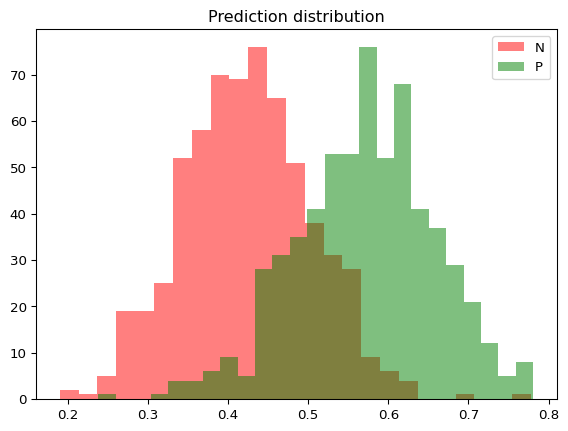

In [5]:
# Evaluation
best_model = search.best_estimator_
print(
    f"Best params:\t\t\t{search.best_params_}",
    f"Best score (validation):\t{search.best_score_:.4f} AUC",
    sep="\n",
)

probas = best_model.predict_proba(X_test)[:, 1]
print(f"ROC-AUC score (test):\t\t{roc_auc_score(y_test, probas):.4f} AUC")


def prediction_distribution(probas, y_test):
    plot_args = {"alpha": 0.5, "bins": 25, "density": False}
    fig, ax = plt.subplots()
    ax.hist(probas[y_test == 0], label="N", color="r", **plot_args)
    ax.hist(probas[y_test == 1], label="P", color="g", **plot_args)
    ax.set_title("Prediction distribution")
    ax.legend()
    plt.show()


prediction_distribution(probas, y_test)

Ha nem foglalkozunk a küszöbbel (tehát hagyjuk a default 0.5-ön), akkor
a `.predict` az alábbi módon hoz döntéseket:

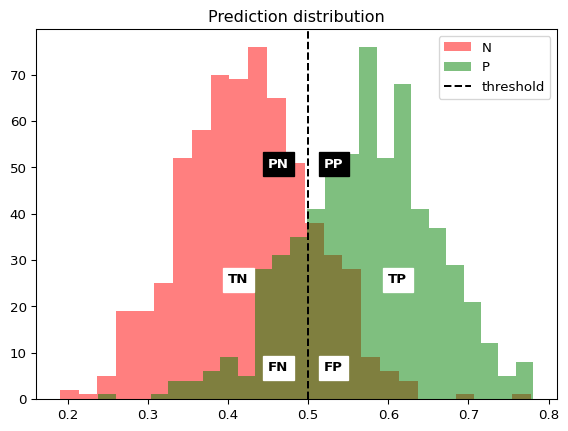

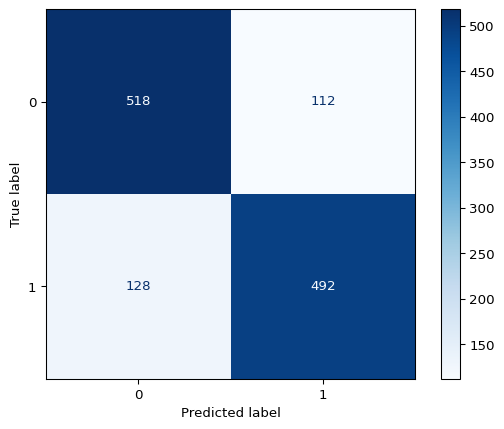

              precision    recall  f1-score   support

           0     0.8019    0.8222    0.8119       630
           1     0.8146    0.7935    0.8039       620

    accuracy                         0.8080      1250
   macro avg     0.8082    0.8079    0.8079      1250
weighted avg     0.8082    0.8080    0.8079      1250


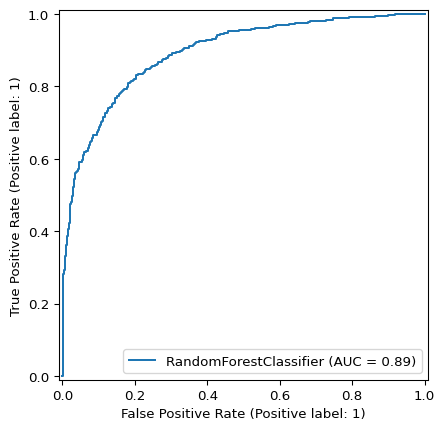

In [6]:
plot_args = {"alpha": 0.5, "bins": 25, "density": False}

fig, ax = plt.subplots()
ax.hist(probas[y_test == 0], label="N", color="r", **plot_args)
ax.hist(probas[y_test == 1], label="P", color="g", **plot_args)

ax.axvline(0.5, color="black", linestyle="--", label="threshold")

ax.text(0.45, 6, "FN", backgroundcolor="white", fontweight="bold")
ax.text(0.52, 6, "FP", backgroundcolor="white", fontweight="bold")
ax.text(0.6, 25, "TP", backgroundcolor="white", fontweight="bold")
ax.text(0.4, 25, "TN", backgroundcolor="white", fontweight="bold")

ax.text(0.45, 50, "PN", color="white", backgroundcolor="black", fontweight="bold")
ax.text(0.52, 50, "PP", color="white", backgroundcolor="black", fontweight="bold")

ax.set_title("Prediction distribution")
ax.legend()
plt.show()

preds = (probas > 0.5).astype("int")
cm = confusion_matrix(y_test, preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, preds, digits=4))

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()